# Compare relative phase shifts between NR and XPHM/XHM 

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
#
from positive import *
from matplotlib.pyplot import *
#
from numpy import *
from numpy.fft import ifft,fftshift,fftfreq,fft
from glob import glob as find
from scipy.interpolate import InterpolatedUnivariateSpline as spline
#
from nrutils.core.basics import *
from nrutils import scsearch,gwylm
#
from lalsimulation import SimInspiralChooseFDWaveform
import lalsimulation as lalsim
#
import xcp
from xcp import determine_data_fitting_region,calibration_catalog,metadata_dict,template_amp_phase,advanced_gmvx_plot

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"
(xcp.core)>> According to the global config, the XCP package is configured to model the [(2, 2), (3, 3)] coprecessing moment multipole moment(s)


In [2]:
#
datadir = '/Users/book/KOALA/PhenomXCP/data/version4/'
data_path = datadir+'calibration_data_dict.pickle'
calibration_data_dict = pickle.load( open( data_path, "rb" ) )

In [3]:
#
# bam_id = 'q8a08t120'
bam_id = 'q8a08t150'
# bam_id = 'q8a08t90'
# bam_id = 'q1a02t30'
# bam_id = 'q2a06t30'
# bam_id = 'q4a08t120'
a = scsearch(keyword=bam_id,verbose=True,catalog=calibration_catalog)[-1]

(scsearch)>> Found catalog (=...) keyword.
(scsearch)>> Found keyword (=q8a08t150) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 1 possibly degenerate simulations:
(scsearch)>> [0001][pnr-catalog] q8: 1chi0.80-p-q8.00	(q8a08t150dP2_T_120_480)



In [4]:
# Get metadata for case. The spins here are in the "LAL" frame
# ---

#
k = [ k for k,simname in enumerate(metadata_dict['simname']) if simname in a.simname ][0]

# Collect params for this case 
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2,chi1_x,chi1_y,chi1_z,chi2_x,chi2_y,chi2_z,Mf,Xf = metadata_dict['array_data'][k,:]

# chi1_vec = array([chi1_y,chi1_x,chi1_z])
# chi2_vec = array([chi2_y,chi2_x,chi2_z])

chi1_vec = array([chi1_x,chi1_y,chi1_z])
chi2_vec = array([chi2_x,chi2_y,chi2_z])

print(chi1_vec)

# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* #
# Load data that has been processed in issue 3c
# ---
ll = mm = 2
(metadata,f,dphi_fd,amp_fd,xphm_dphi,dphi_fd_enforced_min,nr_dphi_lm_shift,min_xphm_dphi_l2m2) = calibration_data_dict[ll,mm][a.simname]
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* #


[-9.84770606e-08 -3.96532060e-01 -6.94794516e-01]


In [5]:
# #
# y = gwylm(a,lmax=4,clean=True,verbose=False,dt=0.5,pad=1000)

In [6]:
# frame = {}
# frame['raw'] = y
# frame['init-j'] = y.__calc_initial_j_frame__()
# frame['j-of-t'] = frame['init-j'].__calc_j_of_t_frame__()
# frame['psi4-td-cp'] = frame['init-j'].__calc_coprecessing_frame__(kind='psi4',transform_domain='td',verbose=True)

In [7]:
# #
# g = frame['psi4-td-cp'].__symmetrize__(zparity=True)

In [8]:
# # plot( abs(g.f), g[2,2]['psi4'].fd_plus.real  )
# plot( g.f, g[2,2]['psi4'].fd_plus.real  )
# # plot( g.f, g[2,2]['psi4'].fd_cross.real  )
# plot( g.f, g[2,2]['psi4'].fd_plus.imag  )
# xlim( 0.02 * array([-1,1]) )

In [9]:
# phase = lambda x: unwrap(angle(x)) - mean(unwrap(angle(x))) + mod(mean(unwrap(angle(x))),2*pi)
# dphase = (phase(g[2,2]['psi4'].fd_plus)-phase(g[2,2]['psi4'].fd_cross))
# dphase = dphase - mean(dphase) + mod(mean(dphase),2*pi)
# plot(g.f, dphase  )
# xlim( 0.18 * array([-1,1]) )
# # xlim( 0.01,0.04 )
# ylim( limy(g.f, dphase ) )
# axhline(0+pi/2,ls='--',color='tab:orange')
# axhline(3*pi/2,ls='--',color='tab:orange')

In [10]:
print( mod(-4.712,2*pi), pi/2 )

1.5711853071795865 1.5707963267948966


In [11]:
# #
# scaled_phi_33 = (2.0/3.0)*g[3,3]['strain'].phi
# scaled_phi_21 = (2.0/1.0)*g[2,1]['strain'].phi

# #
# phi_22 = g[2,2]['strain'].phi

# #
# delta_phi = {}
# delta_phi[3,3] = mod((scaled_phi_33 - phi_22)/3,2*pi)
# delta_phi[2,1] = mod((scaled_phi_21 - phi_22)/1,2*pi)

# #
# luc = lambda m: -pi * ( 1 - m*0.5 )

# #
# figure()
# plot( g.t, phi_22 )
# plot( g.t, scaled_phi_33 )
# plot( g.t, scaled_phi_21 )
# xlim( 190, 1500 )
# ylim( limy(g.t, phi_22,dilate=0.1) )

# #
# figure()
# ell,emm = 3,3
# plot( g.t, delta_phi[ell,emm] )
# xlim( 190, 1500 )
# ylim( limy(g.t, delta_phi[ell,emm],dilate=0.1) )
# # print( mod(pi*0.5 * (3*ell + mod(ell+emm,2)) - pi,2*pi) )
# # print( 3, luc(emm)-2*pi )

# #
# figure()
# ell,emm = 2,1
# plot( g.t, delta_phi[ell,emm] )
# xlim( 190, 1500 )
# ylim( limy(g.t, delta_phi[ell,emm],dilate=0.1) )
# # print( mod(pi*0.5 * (3*ell + mod(ell+emm,2)) - pi,2*pi) )
# # print( 1, luc(emm)+2*pi )
# # axhline( pi*0.5 * (3*ell + mod(ell+emm,2)) - pi )

In [12]:


# figure(figsize=2*figaspect(0.618))

# g22 = g[2,2]['psi4']
# g33 = g[3,3]['psi4']

# x0 = 2.6*g.wstart/(2*pi)
# x1 = 1.9*g22.qnm_prograde_cw.real/(2*pi)

# #
# mask = (g.f>=x0) & (g.f<=2*x1)

# #
# domain22   = g.f[mask]
# codomain22 = g22.fd_phi[mask]

# #
# scale_factor = 3/2
# scaled_domain22 = domain22 / scale_factor
# scaled_codomain22 = codomain22
# plot(scaled_domain22,scaled_codomain22)

# #
# domain33   = g.f[mask]
# codomain33 = g33.fd_phi[mask]

# #
# plot(domain33,codomain33,ls='--')

# # #
# # scale_factor = (2.0/3)
# # domain   = scale_factor * g.f[mask]
# # codomain = scale_factor * g33.fd_phi[mask]
# # plot(domain,codomain)


# xlim( x0*2/3, x1 )
# ylim( limy(domain33,codomain33,dilate=0.1) )
# # xscale('log')

# #
# spl_scaled_codomain22 = spline( scaled_domain22,scaled_codomain22 )(domain33)
# figure()
# phi_diff = -(codomain33-spl_scaled_codomain22)
# phi_diff -= phi_diff[0] + mod(phi_diff[0],2*pi)
# plot( domain33, phi_diff )
# xlim(0.01,0.05 )
# # xlim( x0*2/3, x1 )
# ylim( limy(domain33,phi_diff,dilate=0.1) )




In [13]:


# figure(figsize=2*figaspect(0.618))

# g22 = g[2,2]['psi4']
# g33 = g[3,3]['psi4']

# x0 = 2.6*g.wstart/(2*pi)
# x1 = 1.9*g22.qnm_prograde_cw.real/(2*pi)

# #
# mask = (g.f>=x0) & (g.f<=2*x1)

# #
# domain22   = g.f[mask]
# codomain22 = g22.fd_phi[mask]

# #
# mask22 = (domain22>=x0) & (domain22<=1.5*x0)
# p = polyfit( domain22[mask22], codomain22[mask22], 1 )
# line22 = polyval(p,domain22)

# #
# shifted_codomain22 = codomain22-line22
# plot(domain22,shifted_codomain22)
# # plot(domain22,line22,ls='--',color='r')

# #
# domain33   = g.f[mask]
# codomain33 = g33.fd_phi[mask]

# #
# shifted_codomain33 = codomain33-line22 
# plot(domain33,shifted_codomain33,ls='--')

# # #
# # scale_factor = (2.0/3)
# # domain   = scale_factor * g.f[mask]
# # codomain = scale_factor * g33.fd_phi[mask]
# # plot(domain,codomain)


# xlim( x0*2/3, x1 )
# ylim( limy(domain22,spline_diff(domain22,shifted_codomain22),dilate=0.1) )
# # xscale('log')



In [14]:


# figure(figsize=2*figaspect(0.618))

# g22 = g[2,2]['psi4']

# ll,mm = 3,3
# g33 = g[ll,mm]['psi4']

# #
# domain22   = g.f
# codomain22 = smooth(g22.fd_dphi,width=5).answer
# plot(domain22,codomain22)

# #
# domain33   = g.f * (2.0/mm)
# codomain33 = smooth(g33.fd_dphi,width=5).answer
# plot(domain33,codomain33)


# x0,x1 = 2.1*g.wstart/(2*pi), 1.1*g22.qnm_prograde_cw.real/(2*pi) 

# xlim( x0,x1 )
# ylim( limy(domain22,codomain22,dilate=0.1) )
# xscale('log')

# # /////////// #

# figure(figsize=2*figaspect(0.618))

# codomain = spline(domain33,codomain33)(domain22)-codomain22

# plot(domain22,codomain)


# xlim( x0,x1 )
# ylim( limy(domain22,codomain,dilate=0.1) )
# xscale('log')

# # /////////// #

# figure(figsize=2*figaspect(0.618))


# #
# scaled_domain22   = g.f * (2.0/mm)
# scaled_codomain22 = (float(mm)/2)*spline(scaled_domain22,smooth(g22.fd_phi - mean(g22.fd_phi) + mod(mean(g22.fd_phi),2*pi),width=5).answer)(g33.f)

# #
# codomain = smooth(g33.fd_phi,width=5).answer - scaled_codomain22


# xlim( 0.04,0.2 )
# # ylim( limy(g33.f,codomain,dilate=0.1) )
# # xscale('log')

# plot(g33.f,codomain)
# # plot(scaled_domain22,scaled_codomain22)
# # plot(g33.f,smooth(g33.fd_phi,width=5).answer)
# # plot((2.0/3)*g22.f,scaled_codomain22)
# ylim( limy(g33.f,codomain,dilate=0.1) )


In [15]:
#
# frame['strain-td-cp'] = frame['init-j'].__calc_coprecessing_frame__(kind='strain',transform_domain='td',verbose=True)
from numpy import pi,mod
print(mod(-pi*3/8,2*pi))

5.105088062083414


In [16]:
def get_xphm_coprecessing_phase( ell, emm, q, chi1, chi2, phiRef=0.0, use_pnr=True):
    
    #
    Mtotal = 100.0

    m1_SI = Mtotal * q / (1.0 + q) * lal.MSUN_SI 
    m2_SI = Mtotal / (1.0 + q) * lal.MSUN_SI 

    # generate co-precessing waveform
    lalparams = lal.CreateDict( )
    lalsim.SimInspiralWaveformParamsInsertPhenomXHMThresholdMband(lalparams, 0)
    lalsim.SimInspiralWaveformParamsInsertPhenomXPHMPrecModes(lalparams, 1)

    if use_pnr:
        lalsim.SimInspiralWaveformParamsInsertPhenomXPrecVersion(lalparams, 500);

    distance = 1e6*lal.PC_SI 

    delta_F=0.125 
    f_lower=5.
    fRef=20.
    f_max = 512.

    freqs = np.linspace(f_lower, f_max, int((f_max-f_lower)/delta_F))

    S1x, S1y, S1z = chi1 
    S2x, S2y, S2z = chi2 

    phase = lalsim.SimIMRPhenomXHMPhase(
                    freqs,
                    ell, emm,
                    m1_SI, m2_SI,
                    S1x, S1y, S1z,
                    S2x, S2y, S2z,
                    distance,
                    phiRef,
                    fRef,
                    lalparams
                )
    
    freqs = codef(freqs,Mtotal)
    strain_phase = phase.data
    

    return freqs, strain_phase

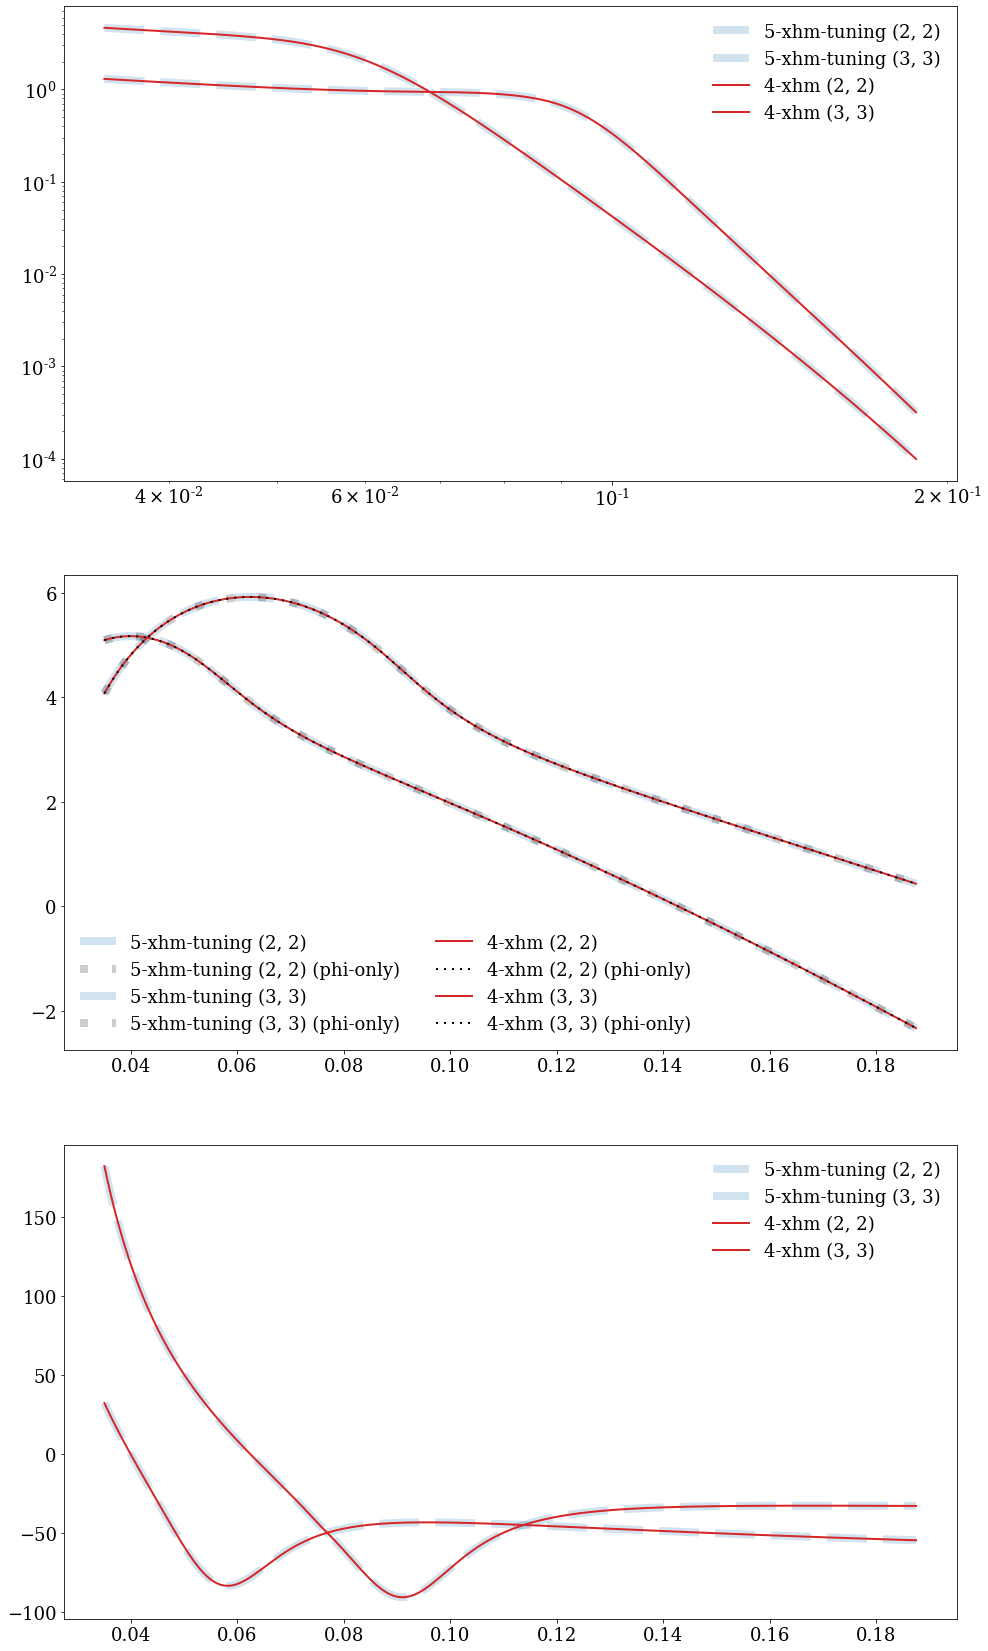

In [17]:
l,m = 3,3
lmlist = [(2,2),(l,m)]
ff = linspace(0.035,0.125*float(l)/2,1e3)

#
fig,ax = subplots(3,1,figsize=4*figaspect(0.618*3))
lw = 2
# opts = ['1-pnr','4-xhm','2-xphm']
# opts = ['5-xhm-tuning','2-xphm']
# opts = ['5-xhm-tuning','1-pnr']
opts = ['5-xhm-tuning','4-xhm']
# opts = ['1-pnr','4-xhm','2-xphm','5-xhm-tuning']
cs = ['k','tab:blue','tab:orange','tab:purple','tab:cyan']

c = { opts[k]:cs[k] for k in range(len(opts)) }

#
ax = ax.flatten()

for opt in opts:

    phenom_phase_dict = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 
    phenom_moments_dict = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt ) 
        
    # phenom_phase_dict = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, array([0,0,1])*chi1_vec, array([0,0,1])*chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 
    # phenom_moments_dict = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, array([0,0,1])*chi1_vec, array([0,0,1])*chi2_vec, option_shorthand=opt )

    #
    for k in lmlist:
        
        #
        h = phenom_moments_dict[k]
        
        #
        amp = abs(h)
        phi = unwrap( angle(h) )
        dphi_raw = spline_diff( ff, phi )
        dphi = dphi_raw #- min(dphi_raw)
        
        #
        phi_ = phenom_phase_dict[k].real #+ pi
        
        #
        center = lambda x: x - max(x) + mod(max(x),2*pi)
        phi  = center(phi)
        phi_ = center(phi_)
        
        #
        alpha = 0.2 if '5' in opt else 1
        lw    =  8  if '5' in opt else 2
        ls    =  '--'  if '5' in opt else '-'
        clr   =  'tab:blue'  if '5' in opt else 'tab:red'
        
        #
        sca( ax[0] )
        plot( ff, amp, lw=lw,ls=ls, label=opt+' %s'%str(k), c = clr, alpha= alpha )
        xscale('log')
        yscale('log')
        
        #
        sca( ax[1] )
        plot( ff, phi, lw=lw,ls=ls, label=opt+' %s'%str(k), c = clr, alpha= alpha )
        plot( ff, phi_, lw=lw,ls=':', label=opt+' %s (phi-only)'%str(k), c = 'k', alpha= alpha )
        
        #
        sca( ax[2] )
        plot( ff, dphi, lw=lw,ls=ls, label=opt+' %s'%str(k), c = clr, alpha= alpha )
    
    
sca(ax[0])
legend()
sca(ax[1])
legend(ncol=2)
sca(ax[2])
legend()
    
#     #
#     h22 = mod_xhm_dict_b[2,2]
    
#     #
#     dphi[opt] = phi_33-scaled_phi_22
    
#     #
#     k = find(ff>=min(f))[0]
#     flat_val = dphi[opt][k] 
    
#     #
#     dphi[opt] += -dphi[opt][k] + mod(flat_val,2*pi)

#     #
#     plot(ff,dphi[opt],lw=1,label=opt.split('-')[-1].upper())
# #     plot(ff,dphi[opt]+(7 if 'pnr' in opt else 0),lw=1,label=opt.split('-')[-1].upper())
#     x0,x1 = xlim(lim(f,dilate=0.1))
# #     xlim(x0,1.5*x0)
    
#     y0_,y1_ = limy(ff,dphi[opt],dilate=0.2)
#     y0 = min(y0,y0_)
#     y1 = max(y1,y1_)
    
# #
# xlabel('$fM$'); ylabel(r'$\Psi_{33}(f)-\frac{3}{2}\Psi_{22}(\frac{2}{3} f )$')
# axvline(min(f),ls='--',c='k',label='Calibration $f_{min}$ and $f_{max}$')
# axvline(max(f),ls='--',c='k')
# axhline(0,c='k',ls=':')
# # xscale('log')
# # ylim(y0,y1)

# x0,x1 = xlim(lim(ff,dilate=0.1))
# # print(lim(f,dilate=0.1))

# # xlim(x0,1.5*x0)
# # xlim(min(ff),2e-2)
# # xlim(0.005,0.0075)
# axhline( mod(-(3.0/4)*pi*(1-3.0/2),2*pi),c='k',alpha=0.25 ,ls='--',lw=2,zorder=-10)
# print('>>', (3.0/4)*pi*(1-3.0/2))
# legend();

# title('%s: No PNR TimeShift; XPHM shows the issue'%a.simname,size=16);


&>> falign = 0.000130
(3,3))>> relative_phase_at_zero_freq = -1.570796&>> falign = 0.000130
(3,3))>> relative_phase_at_zero_freq = -1.570796>> -1.1780972450961724


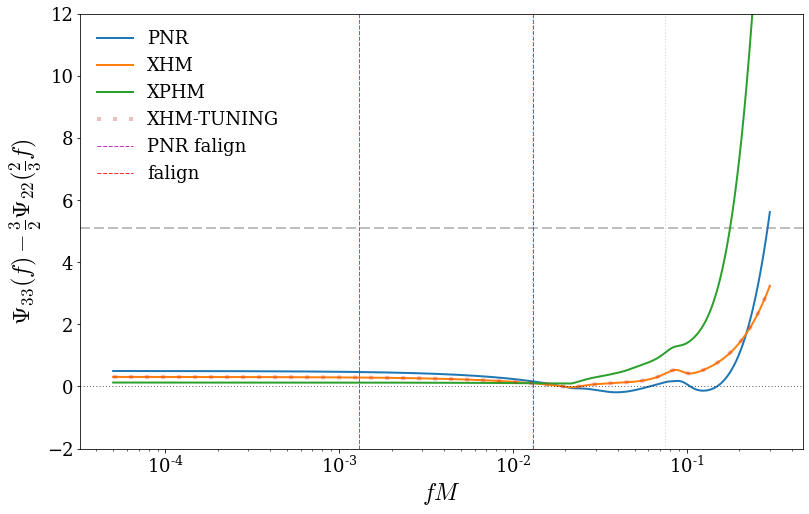

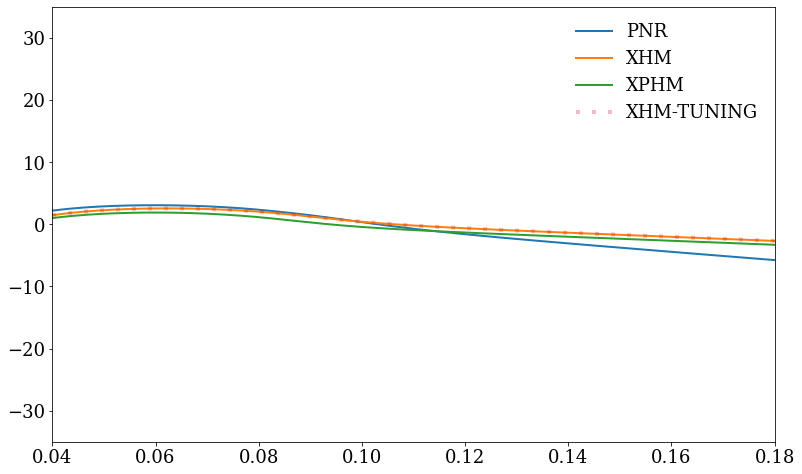

In [23]:
lmlist = [(2,2),(3,3)]
ff = linspace(0.00005,0.3,2e4)

#
fig1 = figure(figsize=2*figaspect(0.618))
ax1 = gca()
fig2 = figure(figsize=2*figaspect(0.618))
ax2 = gca()

dphi = {}
phi22_dict = {}
phi33_dict = {}

#
y0 = inf
y1 = 0
for opt in ['1-pnr','4-xhm','2-xphm','5-xhm-tuning']:

    # mod_xhm_dict_a = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 
    # mod_xhm_dict_b = xcp.get_phenomxphm_coprecessing_multipoles( ff*(2.0/3),lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 

    mod_xhm_dict_a = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 
    mod_xhm_dict_b = xcp.get_phenomxphm_coprecessing_multipoles( ff*(2.0/3),lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt,output_phase_from_lal=True ) 
        

    #
    scaled_phi_22  = (3.0/2) * mod_xhm_dict_b[2,2]
    phi_33         =           mod_xhm_dict_a[3,3]
    
    #
    phi22_dict[opt] = scaled_phi_22 - max(scaled_phi_22) + mod(max(scaled_phi_22),2*pi)
    phi33_dict[opt] = phi_33 - max(phi_33) + mod(max(phi_33),2*pi)
    
    #
    dphi[opt] = phi33_dict[opt]  -  phi22_dict[opt]
    # dphi[opt] = phi_33-scaled_phi_22
    
    #
    k = find(ff>=min(f))[0]
    flat_val = dphi[opt][k] 
    
    #
    dphi[opt] += -dphi[opt][k] + mod(flat_val,2*pi)

    #
    sca(ax1)
    plot(ff,dphi[opt],label=opt[2:].upper(), ls = ':' if '5' in opt else '-',alpha= 0.3 if '5' in opt else 1, lw = 4 if '5' in opt else 2)
    
    y0_,y1_ = limy(ff,dphi[opt],dilate=0.2)
    y0 = min(y0,y0_)
    y1 = max(y1,y1_)

    #
    sca(ax2)
    #plot(ff,phi33_dict[opt],label=opt[2:].upper(), ls = ':' if '5' in opt else '-',alpha= 0.3 if '5' in opt else 1, lw = 4 if '5' in opt else 2)
    plot(ff,phi33_dict[opt],label=opt[2:].upper(), ls = ':' if '5' in opt else '-',alpha= 0.3 if '5' in opt else 1, lw = 4 if '5' in opt else 2)
    
    y0_,y1_ = limy(ff,dphi[opt],dilate=0.2)
    y0 = min(y0,y0_)
    y1 = max(y1,y1_)
    
#
sca(ax1)
xlabel('$fM$'); ylabel(r'$\Psi_{33}(f)-\frac{3}{2}\Psi_{22}(\frac{2}{3} f )$')
axvline(min(f),ls=':',c='k',alpha=0.3)
# axvline(min(f),ls=':',c='k',label='Calibration $f_{min}$ and $f_{max}$')
axvline(max(f),ls=':',c='k',alpha=0.3)
axhline(0,c='k',ls=':')
# xscale('log')
ylim(-2,12)

# x0,x1 = xlim(lim(ff,dilate=0.1))
# print(lim(f,dilate=0.1))

# xlim(x0,1.5*x0)
# xlim(min(ff),2e-2)
# xlim(0.005,0.0075)
axhline( mod((3.0/4)*pi*(1-3.0/2),2*pi),c='k',alpha=0.25 ,ls='--',lw=2,zorder=-10)
print('>>', (3.0/4)*pi*(1-3.0/2))
# legend();
xscale('log')
# title(a.simname)
axvline( 0.0012950,c='m',ls='--',label='PNR falign')
axvline( 0.01295,c='r',ls='--',label='falign')
legend()

# plot(domain22,codomain,alpha = 0.1)

sca(ax2)
xlim(0.04,0.18)
# ylim(-1,7)

ylim(-35,35)
# title(a.simname)
legend();
# title('%s: No PNR TimeShift; XPHM shows the issue'%a.simname,size=16);

In [19]:
a = 0.7
cw,sc = leaver(a,2,2,0)
delta = sqrt(1-a*a)
print( cw, delta )

(0.5326002434543003-0.08079287317466437j) 0.714142842854285


## Check sping-aligned limit

In [20]:


hlm_dict_a = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand='1-pnr' )
hlm_dict_b = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec*array([0,0,1]), chi2_vec*array([0,0,1]), option_shorthand='1-pnr' )
hlm_dict_c = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand='4-xhm' )

figure(figsize=2*figaspect(0.6182))
title( a.simname )

for k in lmlist:
    
    plot( ff, abs(hlm_dict_a[k]), c= 'tab:orange', ls = '-' if k==(2,2) else '--', lw=2, alpha = 0.8, label='PNR' )
    
    plot( ff, abs(hlm_dict_b[k]), c= 'tab:blue', ls = '--' if k==(2,2) else '-', lw=4, alpha = 0.2, label='PNR -- Spin Aligned' )
    
    plot( ff, abs(hlm_dict_c[k]), c= 'k', ls = '-' if k==(2,2) else '--', label='XHM' )
    
    xscale('log')
    yscale('log')
    
    xlim( 0.04,0.18 )
    if k==(2,2):
        ylim( limy(ff, abs(hlm_dict_b[k]),dilate=0.1) )
        legend()

figure(figsize=2*figaspect(0.6182))
title( a.simname )


pha = lambda x: unwrap(angle(x))
for k in [(2,2)]:
    
    plot( ff, pha(hlm_dict_a[k]), c= 'tab:orange', ls = '-' if k==(2,2) else '--', lw=8, alpha = 0.8, label='PNR' )
    
    plot( ff, pha(hlm_dict_b[k]), c= 'tab:blue', ls = '--' if k==(2,2) else '-', lw=4, alpha = 0.2, label='PNR -- Spin Aligned' )
    
    plot( ff, pha(hlm_dict_c[k]), c= 'k', ls = '-' if k==(2,2) else '--', label='XHM' )
    
    xscale('log')
    
    xlim( 0.04,0.18 )
    if k==(2,2):
        ylim( limy(ff, pha(hlm_dict_b[k]),dilate=0.1) )
        legend()


&>> falign = 0.000130
(3,3))>> relative_phase_at_zero_freq = -1.570796&>> falign = 0.000130
(3,3))>> relative_phase_at_zero_freq = -1.570796

AttributeError: 'float' object has no attribute 'simname'

<Figure size 931.737x576 with 0 Axes>

In [20]:
# plot(fqs33,phi33_a)
# plot(fqs22*2.0/3,phi22_a*1.5)
# xlim( lim(fqs22*2.0/3) )

In [21]:
# plot( fqs22*2.0/3, phi33_b - 1.5*phi22_a )
# ?subplots

&>> falign = 0.001295
&>> falign = 0.001295
-404.67657512686753
-401.2103582612234
-401.5032458345282
>> -1.1780972450961724


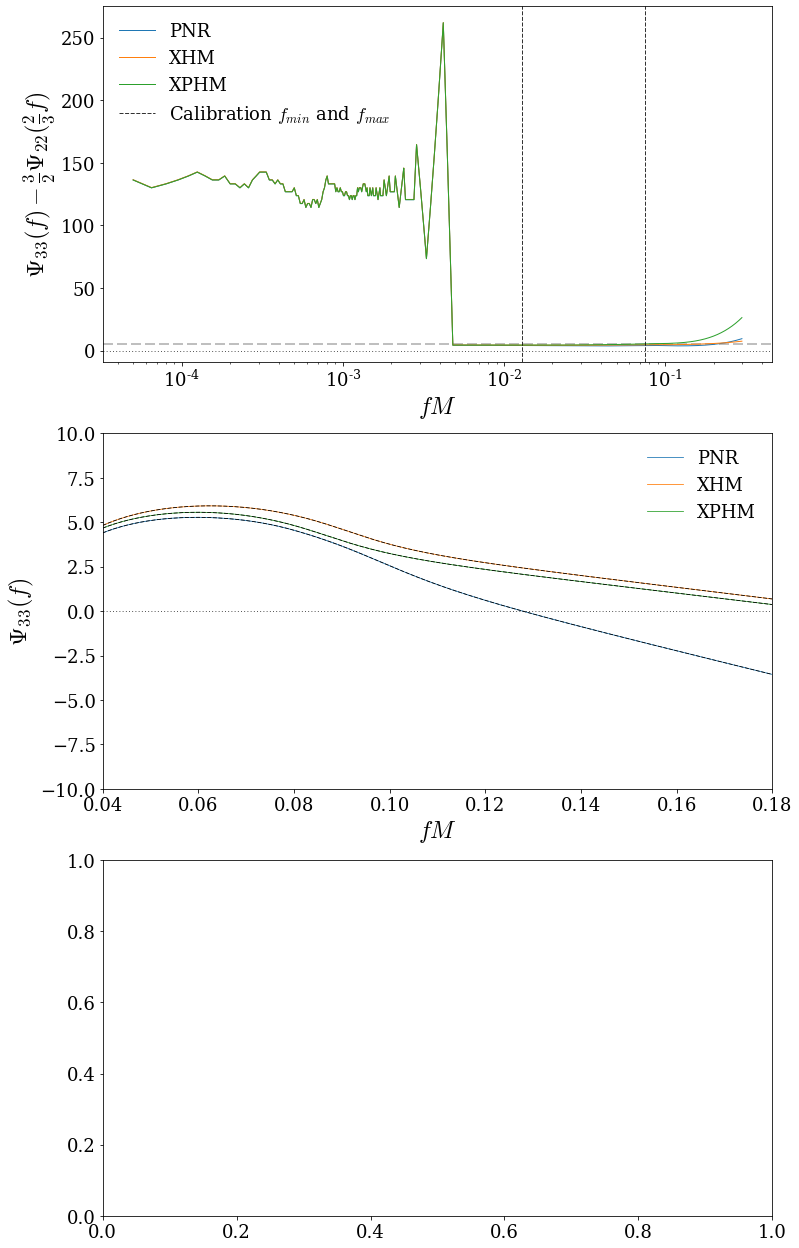

In [22]:
# lmlist = [(2,2),(3,3)]
# ff = linspace(0.005,0.3,5e4)

#
# figure(figsize=2*figaspect(0.618))
fig,ax = subplots( 3,1, figsize=3*figaspect(0.618*3) )
ax = ax.flatten()

dphi = {}

#
y0,y0b = inf,inf
y1 = y1b = 0
for opt in ['1-pnr','4-xhm','2-xphm']:

    mod_xhm_dict_a = xcp.get_phenomxphm_coprecessing_multipoles( ff,lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt ) 
    mod_xhm_dict_b = xcp.get_phenomxphm_coprecessing_multipoles( ff*(2.0/3),lmlist, m1, m2, chi1_vec, chi2_vec, option_shorthand=opt ) # 4-xhm 2-xphm

    #
    mod_xhm = mod_xhm_dict_b[2,2]
    unscaled_phi_22 = unwrap( angle(mod_xhm) )
    unscaled_phi_22 = unscaled_phi_22 - max(unscaled_phi_22) + mod(max(unscaled_phi_22),2*pi)
    scaled_phi_22  = (3.0/2) * unscaled_phi_22
    #
    mod_xhm = mod_xhm_dict_a[3,3]
    phi_33 = unwrap( angle(mod_xhm) )
    phi_33 = phi_33 - max(phi_33) + mod(max(phi_33),2*pi)
    
    #
    dphi[opt] = phi_33-scaled_phi_22
    
    #
    k = find(ff>=min(f))[0]
    flat_val = dphi[opt][k] 
    
    #
    dphi[opt] += -dphi[opt][k] + mod(flat_val,2*pi)
    
    dphi[opt] = dphi[opt]

    #
    sca(ax[0])
#     plot(ff,spline_diff(ff,dphi[opt]),lw=1,label=opt.split('-')[-1].upper())
    plot(ff,dphi[opt],lw=1,label=opt[2:].upper())
    
#     plot(ff,dphi[opt]+(7 if 'pnr' in opt else 0),lw=1,label=opt.split('-')[-1].upper())
    # x0,x1 = xlim(lim(f,dilate=0.1))
#     xlim(x0,1.5*x0)
    
    y0_,y1_ = limy(ff,dphi[opt],dilate=0.2)
    y0 = min(y0,y0_)
    y1 = max(y1,y1_)
    
    sca(ax[1])
    plot( ff, phi_33,label=opt[2:].upper() )
    plot( ff, phi33_dict[opt], ls='--', color='k' )
    xlim(0.04,0.18)
    y0_,y1_ = limy(ff,phi33_dict[opt],dilate=0.2)
    y0b = min(y0b,y0_)
    y1b = max(y1b,y1_)
    #ylim(y0b,y1b)
    ylim(-10,10)
    print(mean(phi33_dict[opt]))
    
#
sca(ax[0])
xlabel('$fM$'); ylabel(r'$\Psi_{33}(f)-\frac{3}{2}\Psi_{22}(\frac{2}{3} f )$')
axvline(min(f),ls='--',c='k',label='Calibration $f_{min}$ and $f_{max}$')
axvline(max(f),ls='--',c='k')
axhline(0,c='k',ls=':')
# xscale('log')
# ylim(-2,9)

# x0,x1 = xlim(lim(ff,dilate=0.1))
# print(lim(f,dilate=0.1))

# xlim(x0,1.5*x0)
# xlim(min(ff),2e-2)
# xlim(0.005,0.0075)
axhline( mod((3.0/4)*pi*(1-3.0/2),2*pi),c='k',alpha=0.25 ,ls='--',lw=2,zorder=-10)
print('>>', (3.0/4)*pi*(1-3.0/2))
legend();
xscale('log')

#
sca(ax[1])
xlabel('$fM$'); ylabel(r'$\Psi_{33}(f)$')
# axvline(min(f),ls='--',c='k',label='Calibration $f_{min}$ and $f_{max}$')
# axvline(max(f),ls='--',c='k')
axhline(0,c='k',ls=':')
legend();
# xscale('log')

In [23]:
print( lim(ff) )

[5.e-05 3.e-01]


In [24]:
# double deltaphiLM =  m_over_2*(
#                                 1./pWF22->eta*IMRPhenomX_Phase_22(two_over_m*falign, &powers_of_f,pPhase22,pWF22)
#                                 +pWFHM->phaseshift 
#                                 + pWFHM->phiref22
#                               )
#                      +pWFHM->timeshift*falign
#                      -3.*LAL_PI_4*(1-m_over_2)
#                      -(IMRPhenomXHM_Inspiral_Phase_AnsatzInt(falign, &powers_of_falign,pPhase)+pPhase->C1INSP*falign+pPhase->CINSP);

In [25]:


# y = frame['strain-td-cp']
# phi_22 = y[2,2]['psi4'].fd_phi
# phi_33 = y[3,3]['psi4'].fd_phi

# d_phi = phi_22-phi_33
# plot( y.f, d_phi )
# x0 = 1.3*y.wstart/(2*pi)
# x1 = 0.3
# xlim( lim(f) )
# ylim( limy(y.f,d_phi) )


In [26]:
# def get_lalsim_msa_angles( ell, f, m1, m2, X1_vec, X2_vec, f_ref=0 ):
    
#     '''Wrapper for lalsim.SimIMRPhenomXPMSAAngles'''
    
#     #
#     import lalsimulation as lalsim
#     import lal
#     from positive.units import codef,codeh,codehf,physf
#     from positive import error
    
#     #
#     if min(f)<0:
#         error('frequencies must be positive')
    
#     #
#     Msol = 100.0
#     m1_SI = lal.MSUN_SI * m1 * Msol/ ( m1 + m2 )
#     m2_SI = lal.MSUN_SI * m2 * Msol/ ( m1 + m2 )
    
#     # Create physical frequencies as a LAL REAL* sequence
#     freqs_Hz = lal.CreateREAL8Sequence( len(f) )
#     freqs_Hz.data = physf(f,Msol)
    
#     #
#     lalparams = lal.CreateDict()
# #     ModeArray = lalsim.SimInspiralCreateModeArray()
# #     lalsim.SimInspiralModeArrayActivateMode(ModeArray, ell,ell)
# #     lalsim.SimInspiralWaveformParamsInsertModeArray(lalparams, ModeArray)

# #     # Turn off multibanding
# #     lalsim.SimInspiralWaveformParamsInsertPhenomXHMThresholdMband(lalparams, 0)
# #     lalsim.SimInspiralWaveformParamsInsertPhenomXPHMThresholdMband(lalparams, 0)
    
#     #
#     f_hz = physf(f,Msol)
#     fmin,fmax = lim(f_hz)
#     df = f_hz[1]-f_hz[0]
    
#     print( fmin,fmax )
    
#     # NOTE that LAL's actual fmin will be min(f_hz)+df
#     u = mod( len(f),2 ) #== 0
#     alert(u)
    
#     # XLALSimIMRPhenomX_PNR_GeneratePNRAnglesHM
#     foo = lalsim.SimIMRPhenomX_PNR_GenerateMSAAngles( m1_SI,
#                                                       m2_SI,
#                                                       X1_vec[0],X1_vec[1],X1_vec[2],
#                                                       X2_vec[0],X2_vec[1],X2_vec[2],
#                                                       df,fmin+u*df,fmax+u*df,f_ref,
#                                                       ell,lalparams )
    
#     # 
#     bar = lalsim.SimIMRPhenomX_PNR_GeneratePNRAnglesHM( m1_SI,
#                                                       m2_SI,
#                                                       X1_vec[0],X1_vec[1],X1_vec[2],
#                                                       X2_vec[0],X2_vec[1],X2_vec[2],
#                                                       df,fmin+u*df,fmax+u*df,f_ref,
#                                                       ell,ell,lalparams )
#     #
#     foo = [ k.data for k in foo ]
#     bar = [ (k if isinstance(k,float) else k.data)  for k in bar ]
    
#     #
#     alpha,beta,gamma,f_lal = foo
#     alpha_pnr,beta_pnr,gamma_pnr,f_lal,alpha_ref,gamma_ref = bar
    
#     #
#     alpha_pnr -= alpha_ref
#     gamma_pnr -= gamma_ref
    
#     #
#     alpha,beta,gamma = [ unwrap(mod(k,2*pi)) for k in (alpha,beta,gamma) ]
    
#     # 
#     f_lal = codef( f_lal, Msol )
#     if sum(abs(f-f_lal))>1e-10:
#         print( lim(f) )
#         print( lim(f_lal) )
#         print( len(f) )
#         print(sum(abs(f-f_lal)))
#         error('Frequency series much match between whats input, and what lal generates internally')
#     # else:
#     #     print(sum(abs(f-f_lal)))
    
#     #
#     return alpha,beta,gamma, alpha_pnr,beta_pnr,gamma_pnr
    

In [27]:
# f = y.f[ (y.f>=y.wstart/(2*pi)) & (y.f<=2*y[2,2]['psi4'].qnm_prograde_fring) ]
# ell = 2

# # I think that I should be interested in the fref=0 behavior here
# alpha,beta,gamma, alpha_pnr,beta_pnr,gamma_pnr = get_lalsim_msa_angles( ell, f, y.m1, y.m2, chi1_vec, chi2_vec, f_ref=20 )
# # alpha,beta,gamma = get_lalsim_msa_angles( ell, f, y.m1, y.m2, chi1_vec, chi2_vec, f_ref=0 )

In [28]:
# chi2_vec

In [29]:
# figure(figsize=2*figaspect(0.618))
# lw=2

# # plot( f,alpha, label='msa alpha', lw=lw )
# # plot( f,alpha_pnr+2*pi, label='PNR alpha', lw=lw )
# # plot( f,beta )
# plot( f,gamma, label='msa gamma' )

# # plot( f,alpha2, ls='--' )
# # plot( f,beta2, ls='--' )
# plot( f,gamma_pnr, ls='-',label='gamma PNR' )

# my_gamma = spline_antidiff(f, -cos(beta_pnr) * spline_diff(f,alpha_pnr) )
# plot( f, my_gamma - my_gamma[0] + gamma[0], '-', label='Minimal rotation gamma' )
# legend()

# xlabel('$fM$')
# title(a.simname)

In [30]:
# plot( y.f, frame['strain-td-cp'][2,2]['strain'].fd_amp )
# yscale('log')
# xscale('log')
# axvline( y.wstart/(2*pi),c='k',ls=':' )
# axvline( y[2,2]['psi4'].qnm_prograde_fring ,c='k',ls=':')

In [31]:

# #
# t = y.t

# #
# plot( t, frame['psi4-td-cp'][2,2]['strain'].phi, c='tab:blue', ls='-' )
# plot( t, frame['psi4-td-cp'][3,3]['strain'].phi, c='tab:blue', ls='--' )

# #
# plot( t, frame['strain-td-cp'][2,2]['strain'].phi, c='tab:orange', ls='-' )
# plot( t, frame['strain-td-cp'][3,3]['strain'].phi, c='tab:orange', ls='--' )


In [32]:

# #
# t = y.t

# #
# A = frame['psi4-td-cp'][2,2]['strain'].phi-frame['strain-td-cp'][2,2]['strain'].phi
# B = frame['psi4-td-cp'][3,3]['strain'].phi-frame['strain-td-cp'][3,3]['strain'].phi

# #
# plot( t, A, c='tab:blue', ls='-' )
# plot( t, B, c='tab:blue', ls='--' )

# xlim(0,2100)
# ylim( limy(t,A) )